In [2]:
# .3 הציגו גרף של סכום מכירות עבור כל חודש בכל שנה.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dim_currency= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_currency_rows.csv')
dim_customer= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_customer_rows (1).csv')
dim_employee= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_employee_rows.csv')
dim_playlist= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_playlist_rows.csv')
dim_track= pd.read_csv('/content/drive/MyDrive/final project/db chinook/dim_track_rows.csv')
fact_invoice= pd.read_csv('/content/drive/MyDrive/final project/db chinook/fact_invoice_rows (1).csv')
fact_invoiceline= pd.read_csv('/content/drive/MyDrive/final project/db chinook/fact_invoiceline_rows.csv')

In [6]:
fact_invoice['invoicedate']= pd.to_datetime(fact_invoice['invoicedate'])

In [7]:
sum_sales= fact_invoice[['invoicedate', 'total']]

In [8]:
sum_sales['year']= sum_sales['invoicedate'].dt.year
sum_sales['month']= sum_sales['invoicedate'].dt.month
sum_sales.head()

<ipython-input-8-fa1a81a5f18d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_sales['year']= sum_sales['invoicedate'].dt.year
<ipython-input-8-fa1a81a5f18d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_sales['month']= sum_sales['invoicedate'].dt.month


,invoicedate,total,year,month
0,2018-01-01 00:00:00+00:00,1.98,2018,1
1,2018-01-02 00:00:00+00:00,3.96,2018,1
2,2018-01-03 00:00:00+00:00,5.94,2018,1
3,2018-01-06 00:00:00+00:00,8.91,2018,1
4,2018-01-11 00:00:00+00:00,13.86,2018,1


In [10]:
sum_sales= sum_sales.groupby(['year', 'month'])['total'].sum().reset_index()

Text(0, 0.5, 'Total Revenue')

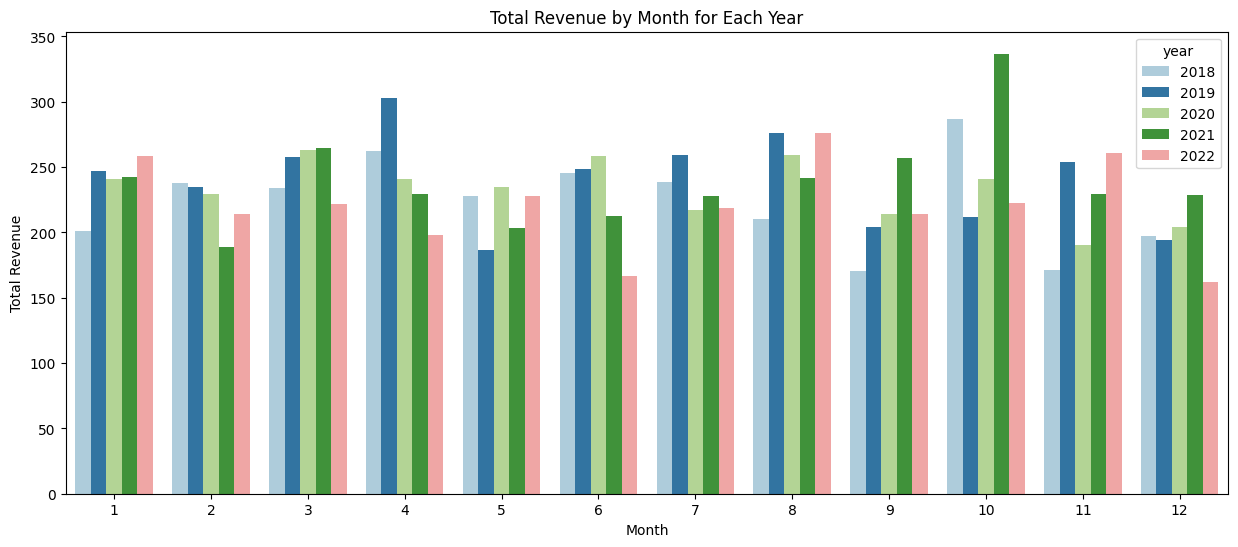

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(data=sum_sales, x='month', y='total',hue='year', palette= 'Paired')
plt.title('Total Revenue by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

### **We decided to use a barplot to visualize the revenue for each month over several years. We think this is the most effective way to highlight the differences for the same month across different years**